## EDA Part 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("bank.csv", na_values =['NA'])
temp = df.columns.values
temp

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'deposit'],
      dtype=object)

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
corr_matrix = df.corr().abs()

In [21]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
upper

,age,balance,day,duration,campaign,pdays,previous
age,NaN,0.1123,0.000762,0.000189,0.005278,0.002774,0.020169
balance,NaN,NaN,0.010467,0.022436,0.013894,0.017411,0.030805
day,NaN,NaN,NaN,0.018511,0.137007,0.077232,0.058981
duration,NaN,NaN,NaN,NaN,0.041557,0.027392,0.026716
campaign,NaN,NaN,NaN,NaN,NaN,0.102726,0.049699
pdays,NaN,NaN,NaN,NaN,NaN,NaN,0.507272
previous,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
to_drop = [col for col in upper.columns if any(upper[col]>.75)]
to_drop

[]

In [23]:
df.drop(to_drop, axis=1, inplace=True)

In [13]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['contact'] = le.fit_transform(res_df['contact'])
    res_df['day_of_week'] = le.fit_transform(res_df['day'])
    res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    return res_df

In [14]:
encoded_df = preprocessor(df)
# x = encoded_df.drop(['deposit'],axis =1).values
# y = encoded_df['deposit'].values

In [22]:
# default threshold parameter is 0, can be set to any float value. All features with variance below this threshold will be removed
selector = VarianceThreshold(threshold = 0)
# fit the defined transform on training dataset
selector.fit(encoded_df)
# transform the training dataset and save as a new DF (don't forget to transform the test dataset as well)
df_clean = pd.DataFrame(selector.transform(encoded_df), columns = encoded_df.columns[selector.get_support(indices=False)])
df_clean

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,day_of_week
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1,4
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1,4
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1,4
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1,4
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0,19
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0,15
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0,18
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0,7


In [24]:
df.drop(columns = df.columns[df.nunique() == 1],inplace = True)

In [25]:
df.drop_duplicates(inplace=True)
df.shape

(11162, 17)

In [6]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age           17.00
balance     1586.00
day           14.00
duration     358.00
campaign       2.00
pdays         21.75
previous       1.00
dtype: float64


In [7]:
print(IQR.balance)

1586.0


In [8]:
print(df['balance'].skew())
df['balance'].describe()

8.224619112755489


count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

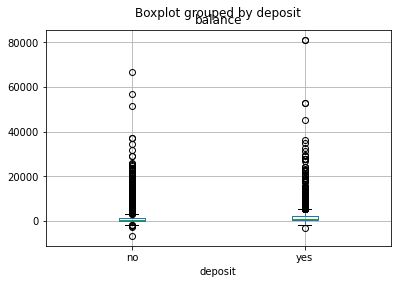

In [9]:
df.boxplot('balance',by='deposit')
plt.show()

In [10]:
print(df['balance'].quantile(0.10))
print(df['balance'].quantile(0.90))

0.0
3897.599999999995


In [11]:
upper = np.where(df["balance"] <= (Q1.balance-1.5*IQR.balance))
lower = np.where(df["balance"] >= (Q3.balance+1.5*IQR.balance))
print(df['balance'].skew())

8.224619112755489


In [12]:
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
print("New Shape: ", df.shape) 

New Shape:  (10106, 17)


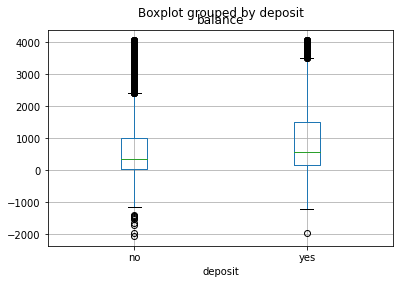

In [13]:
df.boxplot('balance',by='deposit')
plt.show()